# Importing libraries


In [1]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import ast

# Data Import


In [2]:
with open('/Users/meantforengineers/Desktop/fetch rewards/receipts.json') as f:
    df_receipts = pd.DataFrame(json_normalize([json.loads(line) for line in f.readlines()]))


with open('/Users/meantforengineers/Desktop/fetch rewards/brands.json') as f:
    df_brands = pd.DataFrame(json_normalize([json.loads(line) for line in f.readlines()]))
    

with open('/Users/meantforengineers/Desktop/fetch rewards/users.json') as f:
    df_users = pd.DataFrame(json_normalize([json.loads(line) for line in f.readlines()]))

/var/folders/10/zyyld7551psd07cmmdk8bmn40000gn/T/ipykernel_47455/2520451070.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_receipts = pd.DataFrame(json_normalize([json.loads(line) for line in f.readlines()]))
/var/folders/10/zyyld7551psd07cmmdk8bmn40000gn/T/ipykernel_47455/2520451070.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_brands = pd.DataFrame(json_normalize([json.loads(line) for line in f.readlines()]))
/var/folders/10/zyyld7551psd07cmmdk8bmn40000gn/T/ipykernel_47455/2520451070.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_users = pd.DataFrame(json_normalize([json.loads(line) for line in f.readlines()]))


In [3]:
df_receipts.shape

(1119, 15)

In [4]:
df_receipts.columns

Index(['bonusPointsEarned', 'bonusPointsEarnedReason', 'pointsEarned',
       'purchasedItemCount', 'rewardsReceiptItemList', 'rewardsReceiptStatus',
       'totalSpent', 'userId', '_id.$oid', 'createDate.$date',
       'dateScanned.$date', 'finishedDate.$date', 'modifyDate.$date',
       'pointsAwardedDate.$date', 'purchaseDate.$date'],
      dtype='object')

In [5]:
df_receipts.head(3)

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,finishedDate.$date,modifyDate.$date,pointsAwardedDate.$date,purchaseDate.$date
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,1.609632e+12
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,1.609601e+12
2,5.0,All-receipts receipt bonus,5,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1609687537000,1609687537000,NaN,1609687542000,NaN,1.609632e+12


# Transform list to row

In [6]:
df_receipts = df_receipts.explode('rewardsReceiptItemList')

In [7]:
df_receipts.head()

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,finishedDate.$date,modifyDate.$date,pointsAwardedDate.$date,purchaseDate.$date
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,1.609632e+12
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,1.609601e+12
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"{'barcode': '028400642255', 'description': 'DO...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,1.609601e+12
2,5.0,All-receipts receipt bonus,5,1.0,"{'needsFetchReview': False, 'partnerItemId': '...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1609687537000,1609687537000,NaN,1609687542000,NaN,1.609632e+12
3,5.0,All-receipts receipt bonus,5.0,4.0,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,1.609632e+12


In [8]:
df_receipts['rewardsReceiptItemList']

0       {'barcode': '4011', 'description': 'ITEM NOT F...
1       {'barcode': '4011', 'description': 'ITEM NOT F...
1       {'barcode': '028400642255', 'description': 'DO...
2       {'needsFetchReview': False, 'partnerItemId': '...
3       {'barcode': '4011', 'description': 'ITEM NOT F...
                              ...                        
1115                                                  NaN
1116                                                  NaN
1117    {'barcode': 'B076FJ92M4', 'description': 'muel...
1117    {'barcode': 'B07BRRLSVC', 'description': 'thin...
1118                                                  NaN
Name: rewardsReceiptItemList, Length: 7381, dtype: object

Note: Includes NaN values, so replace with {}

In [9]:
df_receipts = df_receipts.fillna({'rewardsReceiptItemList':'{}'})
df_receipts['rewardsReceiptItemList']

0       {'barcode': '4011', 'description': 'ITEM NOT F...
1       {'barcode': '4011', 'description': 'ITEM NOT F...
1       {'barcode': '028400642255', 'description': 'DO...
2       {'needsFetchReview': False, 'partnerItemId': '...
3       {'barcode': '4011', 'description': 'ITEM NOT F...
                              ...                        
1115                                                   {}
1116                                                   {}
1117    {'barcode': 'B076FJ92M4', 'description': 'muel...
1117    {'barcode': 'B07BRRLSVC', 'description': 'thin...
1118                                                   {}
Name: rewardsReceiptItemList, Length: 7381, dtype: object

# Converting to string

In [10]:
df_receipts.rewardsReceiptItemList = df_receipts.rewardsReceiptItemList.apply(lambda x:str(x))
df_receipts.rewardsReceiptItemList = df_receipts.rewardsReceiptItemList.apply(ast.literal_eval)


In [11]:
df_receipts.rewardsReceiptItemList

0       {'barcode': '4011', 'description': 'ITEM NOT F...
1       {'barcode': '4011', 'description': 'ITEM NOT F...
1       {'barcode': '028400642255', 'description': 'DO...
2       {'needsFetchReview': False, 'partnerItemId': '...
3       {'barcode': '4011', 'description': 'ITEM NOT F...
                              ...                        
1115                                                   {}
1116                                                   {}
1117    {'barcode': 'B076FJ92M4', 'description': 'muel...
1117    {'barcode': 'B07BRRLSVC', 'description': 'thin...
1118                                                   {}
Name: rewardsReceiptItemList, Length: 7381, dtype: object

# Normalizing

In [12]:
df_rewards = pd.json_normalize(df_receipts.rewardsReceiptItemList, errors='ignore', sep=',', max_level=1)

In [13]:
df_rewards.head()

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merging on index

In [14]:
receipts_reward = pd.merge(df_receipts,df_rewards,left_index=True, right_index=True)

In [15]:
receipts_reward.head()

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned_x,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned_y,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1609687531000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"{'barcode': '028400642255', 'description': 'DO...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,All-receipts receipt bonus,5,1.0,"{'needsFetchReview': False, 'partnerItemId': '...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1609687537000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,All-receipts receipt bonus,5.0,4.0,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,1609687534000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
receipts_reward.columns

Index(['bonusPointsEarned', 'bonusPointsEarnedReason', 'pointsEarned_x',
       'purchasedItemCount', 'rewardsReceiptItemList', 'rewardsReceiptStatus',
       'totalSpent', 'userId', '_id.$oid', 'createDate.$date',
       'dateScanned.$date', 'finishedDate.$date', 'modifyDate.$date',
       'pointsAwardedDate.$date', 'purchaseDate.$date', 'barcode',
       'description', 'finalPrice', 'itemPrice', 'needsFetchReview',
       'partnerItemId', 'preventTargetGapPoints', 'quantityPurchased',
       'userFlaggedBarcode', 'userFlaggedNewItem', 'userFlaggedPrice',
       'userFlaggedQuantity', 'needsFetchReviewReason',
       'pointsNotAwardedReason', 'pointsPayerId', 'rewardsGroup',
       'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned_y', 'targetP

In [17]:
receipts_reward.iloc[0]

bonusPointsEarned                                                                 500.0
bonusPointsEarnedReason               Receipt number 2 completed, bonus point schedu...
pointsEarned_x                                                                    500.0
purchasedItemCount                                                                  5.0
rewardsReceiptItemList                {'barcode': '4011', 'description': 'ITEM NOT F...
rewardsReceiptStatus                                                           FINISHED
totalSpent                                                                        26.00
userId                                                         5ff1e1eacfcf6c399c274ae6
_id.$oid                                                       5ff1e1eb0a720f0523000575
createDate.$date                                                          1609687531000
dateScanned.$date                                                         1609687531000
finishedDate.$date              

# Checking datatypes

In [18]:
receipts_reward.dtypes

bonusPointsEarned                     float64
bonusPointsEarnedReason                object
pointsEarned_x                         object
purchasedItemCount                    float64
rewardsReceiptItemList                 object
rewardsReceiptStatus                   object
totalSpent                             object
userId                                 object
_id.$oid                               object
createDate.$date                        int64
dateScanned.$date                       int64
finishedDate.$date                    float64
modifyDate.$date                        int64
pointsAwardedDate.$date               float64
purchaseDate.$date                    float64
barcode                                object
description                            object
finalPrice                             object
itemPrice                              object
needsFetchReview                       object
partnerItemId                          object
preventTargetGapPoints            

# Changing Datatypes

In [19]:

receipts_reward['createDate.$date'] = pd.to_datetime(receipts_reward['createDate.$date'], unit="ms")
receipts_reward['dateScanned.$date'] = pd.to_datetime(receipts_reward['dateScanned.$date'], unit="ms")
receipts_reward['finishedDate.$date'] = pd.to_datetime(receipts_reward['finishedDate.$date'], unit="ms")
receipts_reward['modifyDate.$date'] = pd.to_datetime(receipts_reward['modifyDate.$date'], unit="ms")
receipts_reward['pointsAwardedDate.$date'] = pd.to_datetime(receipts_reward['pointsAwardedDate.$date'], unit="ms")
receipts_reward['purchaseDate.$date'] = pd.to_datetime(receipts_reward['purchaseDate.$date'], unit="ms")



In [20]:
x = 1609687531000
pd.to_datetime(x, unit="ms")


Timestamp('2021-01-03 15:25:31')

In [21]:
x = 1614493656453
pd.to_datetime(x, unit="ms")

Timestamp('2021-02-28 06:27:36.453000')

# Renaming Columns

In [22]:

df_receipts_reward = receipts_reward.rename(columns = {'_id.$oid':'uuid', 
                     'createDate.$date':'created_date',
                     'dateScanned.$date':'scanned_date',
                     'finishedDate.$date':'finish_date',
                     'modifyDate.$date':'modify_date',
                     'pointsAwardedDate.$date':'pointsawarded_date',
                     'purchaseDate.$date':'purchased_date',
                     'pointsEarned_x':'pointsEarned'})


In [23]:
df_receipts_reward.columns

Index(['bonusPointsEarned', 'bonusPointsEarnedReason', 'pointsEarned',
       'purchasedItemCount', 'rewardsReceiptItemList', 'rewardsReceiptStatus',
       'totalSpent', 'userId', 'uuid', 'created_date', 'scanned_date',
       'finish_date', 'modify_date', 'pointsawarded_date', 'purchased_date',
       'barcode', 'description', 'finalPrice', 'itemPrice', 'needsFetchReview',
       'partnerItemId', 'preventTargetGapPoints', 'quantityPurchased',
       'userFlaggedBarcode', 'userFlaggedNewItem', 'userFlaggedPrice',
       'userFlaggedQuantity', 'needsFetchReviewReason',
       'pointsNotAwardedReason', 'pointsPayerId', 'rewardsGroup',
       'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned_y', 'targetPrice',
       'competitiveProduct', 'origin

# New DataFrame

In [24]:
df_receipts_reward = df_receipts_reward[['bonusPointsEarned', 'bonusPointsEarnedReason', 'pointsEarned',
       'purchasedItemCount', 'rewardsReceiptStatus',
       'totalSpent', 'userId', 'uuid', 'created_date', 'scanned_date',
       'finish_date', 'modify_date', 'pointsawarded_date', 'purchased_date',
       'barcode', 'description', 'finalPrice', 'itemPrice', 'needsFetchReview',
       'partnerItemId', 'preventTargetGapPoints', 'quantityPurchased',
       'userFlaggedBarcode', 'userFlaggedNewItem', 'userFlaggedPrice',
       'userFlaggedQuantity', 'needsFetchReviewReason',
       'pointsNotAwardedReason', 'pointsPayerId', 'rewardsGroup',
       'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned_y', 'targetPrice',
       'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId']]

# Clean Receipts data

In [25]:
df_receipts_reward.iloc[0]

bonusPointsEarned                                                                 500.0
bonusPointsEarnedReason               Receipt number 2 completed, bonus point schedu...
pointsEarned                                                                      500.0
purchasedItemCount                                                                  5.0
rewardsReceiptStatus                                                           FINISHED
totalSpent                                                                        26.00
userId                                                         5ff1e1eacfcf6c399c274ae6
uuid                                                           5ff1e1eb0a720f0523000575
created_date                                                        2021-01-03 15:25:31
scanned_date                                                        2021-01-03 15:25:31
finish_date                                                         2021-01-03 15:25:31
modify_date                     

# Brands data

In [26]:
df_brands.head(2)

,barcode,category,categoryCode,name,topBrand,_id.$oid,cpg.$id.$oid,cpg.$ref,brandCode
0,511111019862,Baking,BAKING,test brand @1612366101024,False,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,NaN
1,511111519928,Beverages,BEVERAGES,Starbucks,False,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS


In [27]:
df_brands.shape

(1167, 9)

In [28]:
df_brands.columns

Index(['barcode', 'category', 'categoryCode', 'name', 'topBrand', '_id.$oid',
       'cpg.$id.$oid', 'cpg.$ref', 'brandCode'],
      dtype='object')

# Renaming column

In [29]:
df_brands = df_brands.rename(columns = {'_id.$oid':'uuid'
                                       ,'cpg.$id.$oid':'cpg_id'
                                       ,'cpg.$ref':'cpg_ref'})

In [30]:
df_brands.head()

,barcode,category,categoryCode,name,topBrand,uuid,cpg_id,cpg_ref,brandCode
0,511111019862,Baking,BAKING,test brand @1612366101024,False,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,NaN
1,511111519928,Beverages,BEVERAGES,Starbucks,False,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS
2,511111819905,Baking,BAKING,test brand @1612366146176,False,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146176
3,511111519874,Baking,BAKING,test brand @1612366146051,False,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146051
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1612366146827


# Clean Brands data

In [31]:
df_brands.iloc[0]

barcode                      511111019862
category                           Baking
categoryCode                       BAKING
name            test brand @1612366101024
topBrand                            False
uuid             601ac115be37ce2ead437551
cpg_id           601ac114be37ce2ead437550
cpg_ref                              Cogs
brandCode                             NaN
Name: 0, dtype: object

# Users data

In [32]:
df_users.head()

,active,role,signUpSource,state,_id.$oid,createdDate.$date,lastLogin.$date
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,1609687530554,1.609688e+12
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12


# Changing datatype

In [33]:
df_users['lastLogin.$date'] = pd.to_datetime(df_users['lastLogin.$date'], unit="ms")
df_users['createdDate.$date'] = pd.to_datetime(df_users['createdDate.$date'], unit="ms")


# Rename column

In [34]:
df_users = df_users.rename(columns = {'_id.$oid':'uuid',
                                     'createdDate.$date':'created_date',
                                     'lastLogin.$date':'lastLogin_date'})

# Clean Users data

In [35]:
df_users.iloc[0]

active                                     True
role                                   consumer
signUpSource                              Email
state                                        WI
uuid                   5ff1e194b6a9d73a3a9f1052
created_date         2021-01-03 15:24:04.800000
lastLogin_date    2021-01-03 15:25:37.857999872
Name: 0, dtype: object

# Check shape of data

In [36]:
df_receipts_reward.shape

(7381, 48)

In [37]:
df_brands.shape

(1167, 9)

In [38]:
df_users.shape

(495, 7)

# Check Column names

In [39]:
df_receipts_reward.columns

Index(['bonusPointsEarned', 'bonusPointsEarnedReason', 'pointsEarned',
       'purchasedItemCount', 'rewardsReceiptStatus', 'totalSpent', 'userId',
       'uuid', 'created_date', 'scanned_date', 'finish_date', 'modify_date',
       'pointsawarded_date', 'purchased_date', 'barcode', 'description',
       'finalPrice', 'itemPrice', 'needsFetchReview', 'partnerItemId',
       'preventTargetGapPoints', 'quantityPurchased', 'userFlaggedBarcode',
       'userFlaggedNewItem', 'userFlaggedPrice', 'userFlaggedQuantity',
       'needsFetchReviewReason', 'pointsNotAwardedReason', 'pointsPayerId',
       'rewardsGroup', 'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned_y', 'targetPrice',
       'competitiveProduct', 'originalFinalPrice',
       'originalMe

In [40]:
df_brands.columns

Index(['barcode', 'category', 'categoryCode', 'name', 'topBrand', 'uuid',
       'cpg_id', 'cpg_ref', 'brandCode'],
      dtype='object')

In [41]:
df_users.columns

Index(['active', 'role', 'signUpSource', 'state', 'uuid', 'created_date',
       'lastLogin_date'],
      dtype='object')

# Explore data 

In [42]:
df_users.head()

,active,role,signUpSource,state,uuid,created_date,lastLogin_date
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,2021-01-03 15:25:30.554,2021-01-03 15:25:30.596999936
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872


In [43]:
df_brands.head()

,barcode,category,categoryCode,name,topBrand,uuid,cpg_id,cpg_ref,brandCode
0,511111019862,Baking,BAKING,test brand @1612366101024,False,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,NaN
1,511111519928,Beverages,BEVERAGES,Starbucks,False,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS
2,511111819905,Baking,BAKING,test brand @1612366146176,False,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146176
3,511111519874,Baking,BAKING,test brand @1612366146051,False,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146051
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1612366146827


In [44]:
df_receipts_reward.head()

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId,uuid,created_date,scanned_date,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned_y,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,2021-01-03 15:25:31,2021-01-03 15:25:31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,2021-01-03 15:24:43,2021-01-03 15:24:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,2021-01-03 15:24:43,2021-01-03 15:24:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,All-receipts receipt bonus,5,1.0,REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,2021-01-03 15:25:37,2021-01-03 15:25:37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,All-receipts receipt bonus,5.0,4.0,FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,2021-01-03 15:25:34,2021-01-03 15:25:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_users.nunique()

active              2
role                2
signUpSource        2
state               8
uuid              212
created_date      212
lastLogin_date    172
dtype: int64

In [46]:
df_brands.nunique()

barcode         1160
category          23
categoryCode      14
name            1156
topBrand           2
uuid            1167
cpg_id           196
cpg_ref            2
brandCode        897
dtype: int64

In [47]:
df_receipts_reward.nunique()

bonusPointsEarned                       12
bonusPointsEarnedReason                  9
pointsEarned                           120
purchasedItemCount                      50
rewardsReceiptStatus                     5
totalSpent                              94
userId                                 258
uuid                                  1119
created_date                          1107
scanned_date                          1107
finish_date                            553
modify_date                           1104
pointsawarded_date                     523
purchased_date                         358
barcode                                184
description                            236
finalPrice                             149
itemPrice                              149
needsFetchReview                         2
partnerItemId                          221
preventTargetGapPoints                   1
quantityPurchased                        8
userFlaggedBarcode                       6
userFlagged

# Removing duplicate rows

In [48]:
df_receipts_reward = df_receipts_reward.drop_duplicates(subset=['uuid'])

In [49]:
df_receipts_reward.head()

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId,uuid,created_date,scanned_date,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned_y,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,2021-01-03 15:25:31,2021-01-03 15:25:31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,2021-01-03 15:24:43,2021-01-03 15:24:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,All-receipts receipt bonus,5,1.0,REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,2021-01-03 15:25:37,2021-01-03 15:25:37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,All-receipts receipt bonus,5.0,4.0,FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,2021-01-03 15:25:34,2021-01-03 15:25:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,All-receipts receipt bonus,5.0,2.0,FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,2021-01-03 15:25:06,2021-01-03 15:25:06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_receipts_reward.iloc[1]

bonusPointsEarned                                                                 150.0
bonusPointsEarnedReason               Receipt number 5 completed, bonus point schedu...
pointsEarned                                                                      150.0
purchasedItemCount                                                                  2.0
rewardsReceiptStatus                                                           FINISHED
totalSpent                                                                        11.00
userId                                                         5ff1e194b6a9d73a3a9f1052
uuid                                                           5ff1e1bb0a720f052300056b
created_date                                                        2021-01-03 15:24:43
scanned_date                                                        2021-01-03 15:24:43
finish_date                                                         2021-01-03 15:24:43
modify_date                     

# Extracting data

In [51]:
df_receipts_reward.to_csv('df_receipts_rewards.csv', na_rep='NULL')

In [52]:
df_brands.to_csv('df_brands.csv', na_rep='NULL')

In [53]:
df_users.to_csv('df_users.csv', na_rep='NULL')

# E-R Diagram

# 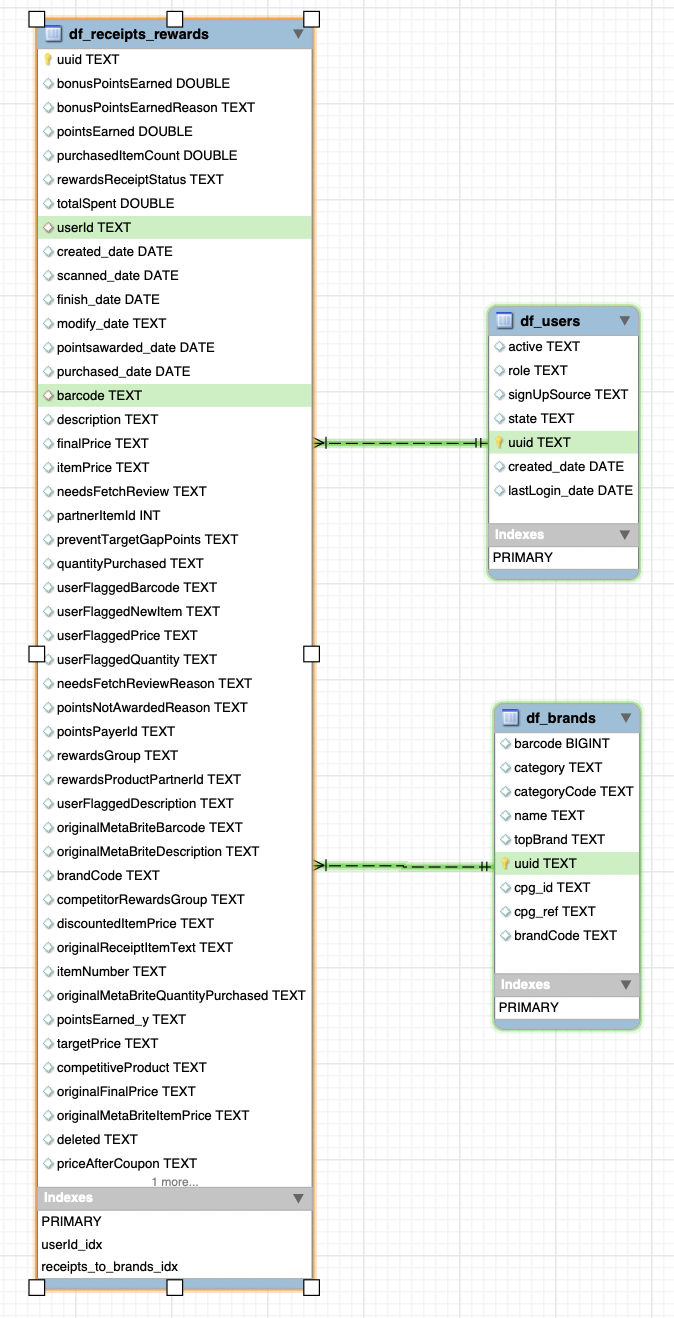

# Fourth: Communicate with Stakeholders


    # Hi team,
    
    I have used Python and MySQL to curate Nested JSON data for receipts, brands as well as users. 
     

   
    
    I wanted to know how is the data collected and what are some data errors in dataset. 
    
    The receipts data was stored as JSON, so when parsing nested JSON data, data quality issues arised. 
    
    To resolve data quality issues, we need accurate, complete datasets so that the data can be reliable. 
    
    To improve data analytics, can we embed metadata information as well as define metrics that can be measure them goal to improve customer experience. 
    
    Some of the performance and scaling concers might arise while parsing JSON multiple level nested data, as more receipts data gets generated which when cleaned. Also, processing or rolling up duplicate data generated while unnesting receipts reward to get item level will have performance concerns on database.
    
    
    
    
    
    